In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
# import os
# os.chdir("D:\\Academic Operations\\Online + BACP\\Data Mining (Machine Learning)\\New Content by Gurumoorthy\\Final\\Codes and Datasets\\Codes and Datasets\\Codes and Datasets\\Decision Trees\\CART\\Python")

In [32]:
credit_df = pd.read_csv("GermanCreditDataset.csv")

In [4]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [6]:
credit_df.shape

(1000, 17)

In [7]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [33]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in credit_df.columns: 
    if credit_df[feature].dtype == 'object': 
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes # Converts the Categorical output to numpy array before storing it



In [9]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
dtypes: int6

In [13]:
credit_df.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1,0
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0,1
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1


In [34]:
# capture the target column ("default") into separate vectors for training set and test set

X = credit_df.drop("default" , axis=1)

y = credit_df.pop("default")




In [35]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)



In [36]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [37]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [38]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()



In [39]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.140455
months_loan_duration  0.106273
credit_history        0.059737
purpose               0.053012
amount                0.193906
savings_balance       0.077748
employment_duration   0.061263
percent_of_income     0.042734
years_at_residence    0.044122
age                   0.124186
other_credit          0.027465
housing               0.007973
existing_loans_count  0.012179
job                   0.023460
dependents            0.013349
phone                 0.012139


In [40]:
y_predict = dt_model.predict(X_test)

#                                      Regularising the Decision Tree

In [42]:

reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [43]:
credit_tree_regularized = open('credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.140455
months_loan_duration  0.106273
credit_history        0.059737
purpose               0.053012
amount                0.193906
savings_balance       0.077748
employment_duration   0.061263
percent_of_income     0.042734
years_at_residence    0.044122
age                   0.124186
other_credit          0.027465
housing               0.007973
existing_loans_count  0.012179
job                   0.023460
dependents            0.013349
phone                 0.012139


In [44]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [46]:
import matplotlib.pyplot as plt

AUC: 0.851


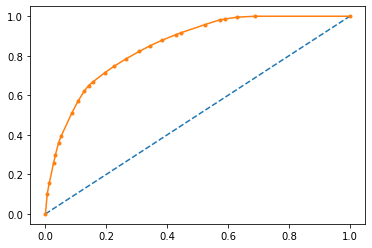

In [50]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
# print(probs)
probs = probs[:, 1]
# print(probs)
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.731


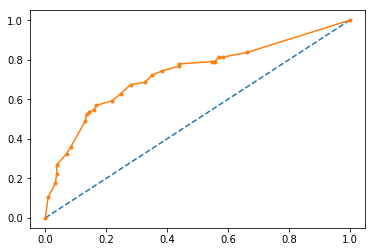

In [32]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       486
           1       0.68      0.62      0.65       214

   micro avg       0.80      0.80      0.80       700
   macro avg       0.76      0.75      0.75       700
weighted avg       0.79      0.80      0.79       700



In [50]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       214
           1       0.60      0.53      0.56        86

   micro avg       0.76      0.76      0.76       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.76      0.76      0.76       300



In [57]:
confusion_matrix(train_labels, ytrain_predict)

array([[424,  62],
       [ 81, 133]], dtype=int64)

In [58]:
confusion_matrix(test_labels, ytest_predict)

array([[183,  31],
       [ 40,  46]], dtype=int64)

In [60]:
reg_dt_model.score(X_train,train_labels)

0.7957142857142857

In [61]:
reg_dt_model.score(X_test,test_labels)

0.7633333333333333